<a href="https://colab.research.google.com/github/parteeksingh24/ECS171_FinalProject/blob/main/ForestFiresProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [10]:
# Load the forest fires dataset
#df_forest_fires = pd.read_csv('forestfires.csv')
df_forest_fires = pd.read_csv('forest+fires/forestfires.csv')
print(df_forest_fires)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [13]:
# Initial data exploration
df_forest_fires.info() # Check data structure
df_forest_fires.describe() # Check basic statistics about dataset
df_forest_fires.isnull().sum() # Make sure no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              517 non-null    int64  
 1   Y              517 non-null    int64  
 2   month          517 non-null    object 
 3   day            517 non-null    object 
 4   FFMC           517 non-null    float64
 5   DMC            517 non-null    float64
 6   DC             517 non-null    float64
 7   ISI            517 non-null    float64
 8   temp           517 non-null    float64
 9   RH             517 non-null    int64  
 10  wind           517 non-null    float64
 11  rain           517 non-null    float64
 12  area           517 non-null    float64
 13  fire_occurred  517 non-null    int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 56.7+ KB


X                0
Y                0
month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
fire_occurred    0
dtype: int64

In [14]:
# Create binary target variable -- has a fire occured or not?
df_forest_fires['fire_occurred'] = df_forest_fires['area'].apply(lambda x: 1 if x > 0 else 0)
# Column based on the Area > 0 or = 0

print(df_forest_fires.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

   fire_occurred  
0              0  
1              0  
2              0  
3              0  
4              0  


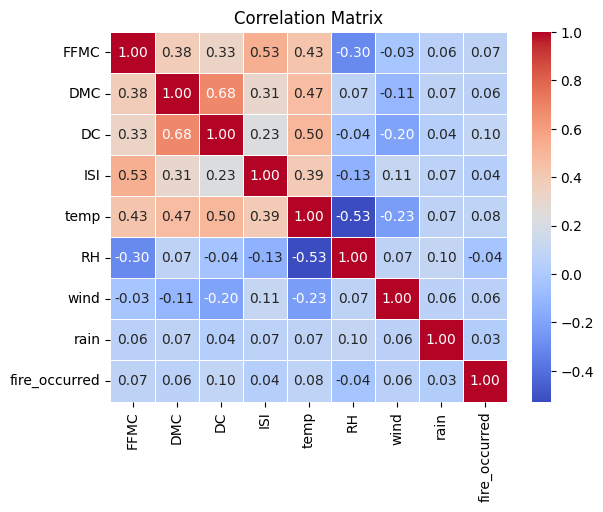

In [16]:
# Explore variable correlations
df_forest_fires_cont_vars = df_forest_fires.drop(columns = ['X', 'Y', 'month', 'day', 'area'])
cont_vars_corr_matrix = df_forest_fires_cont_vars.corr()
heatmap = sns.heatmap(cont_vars_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

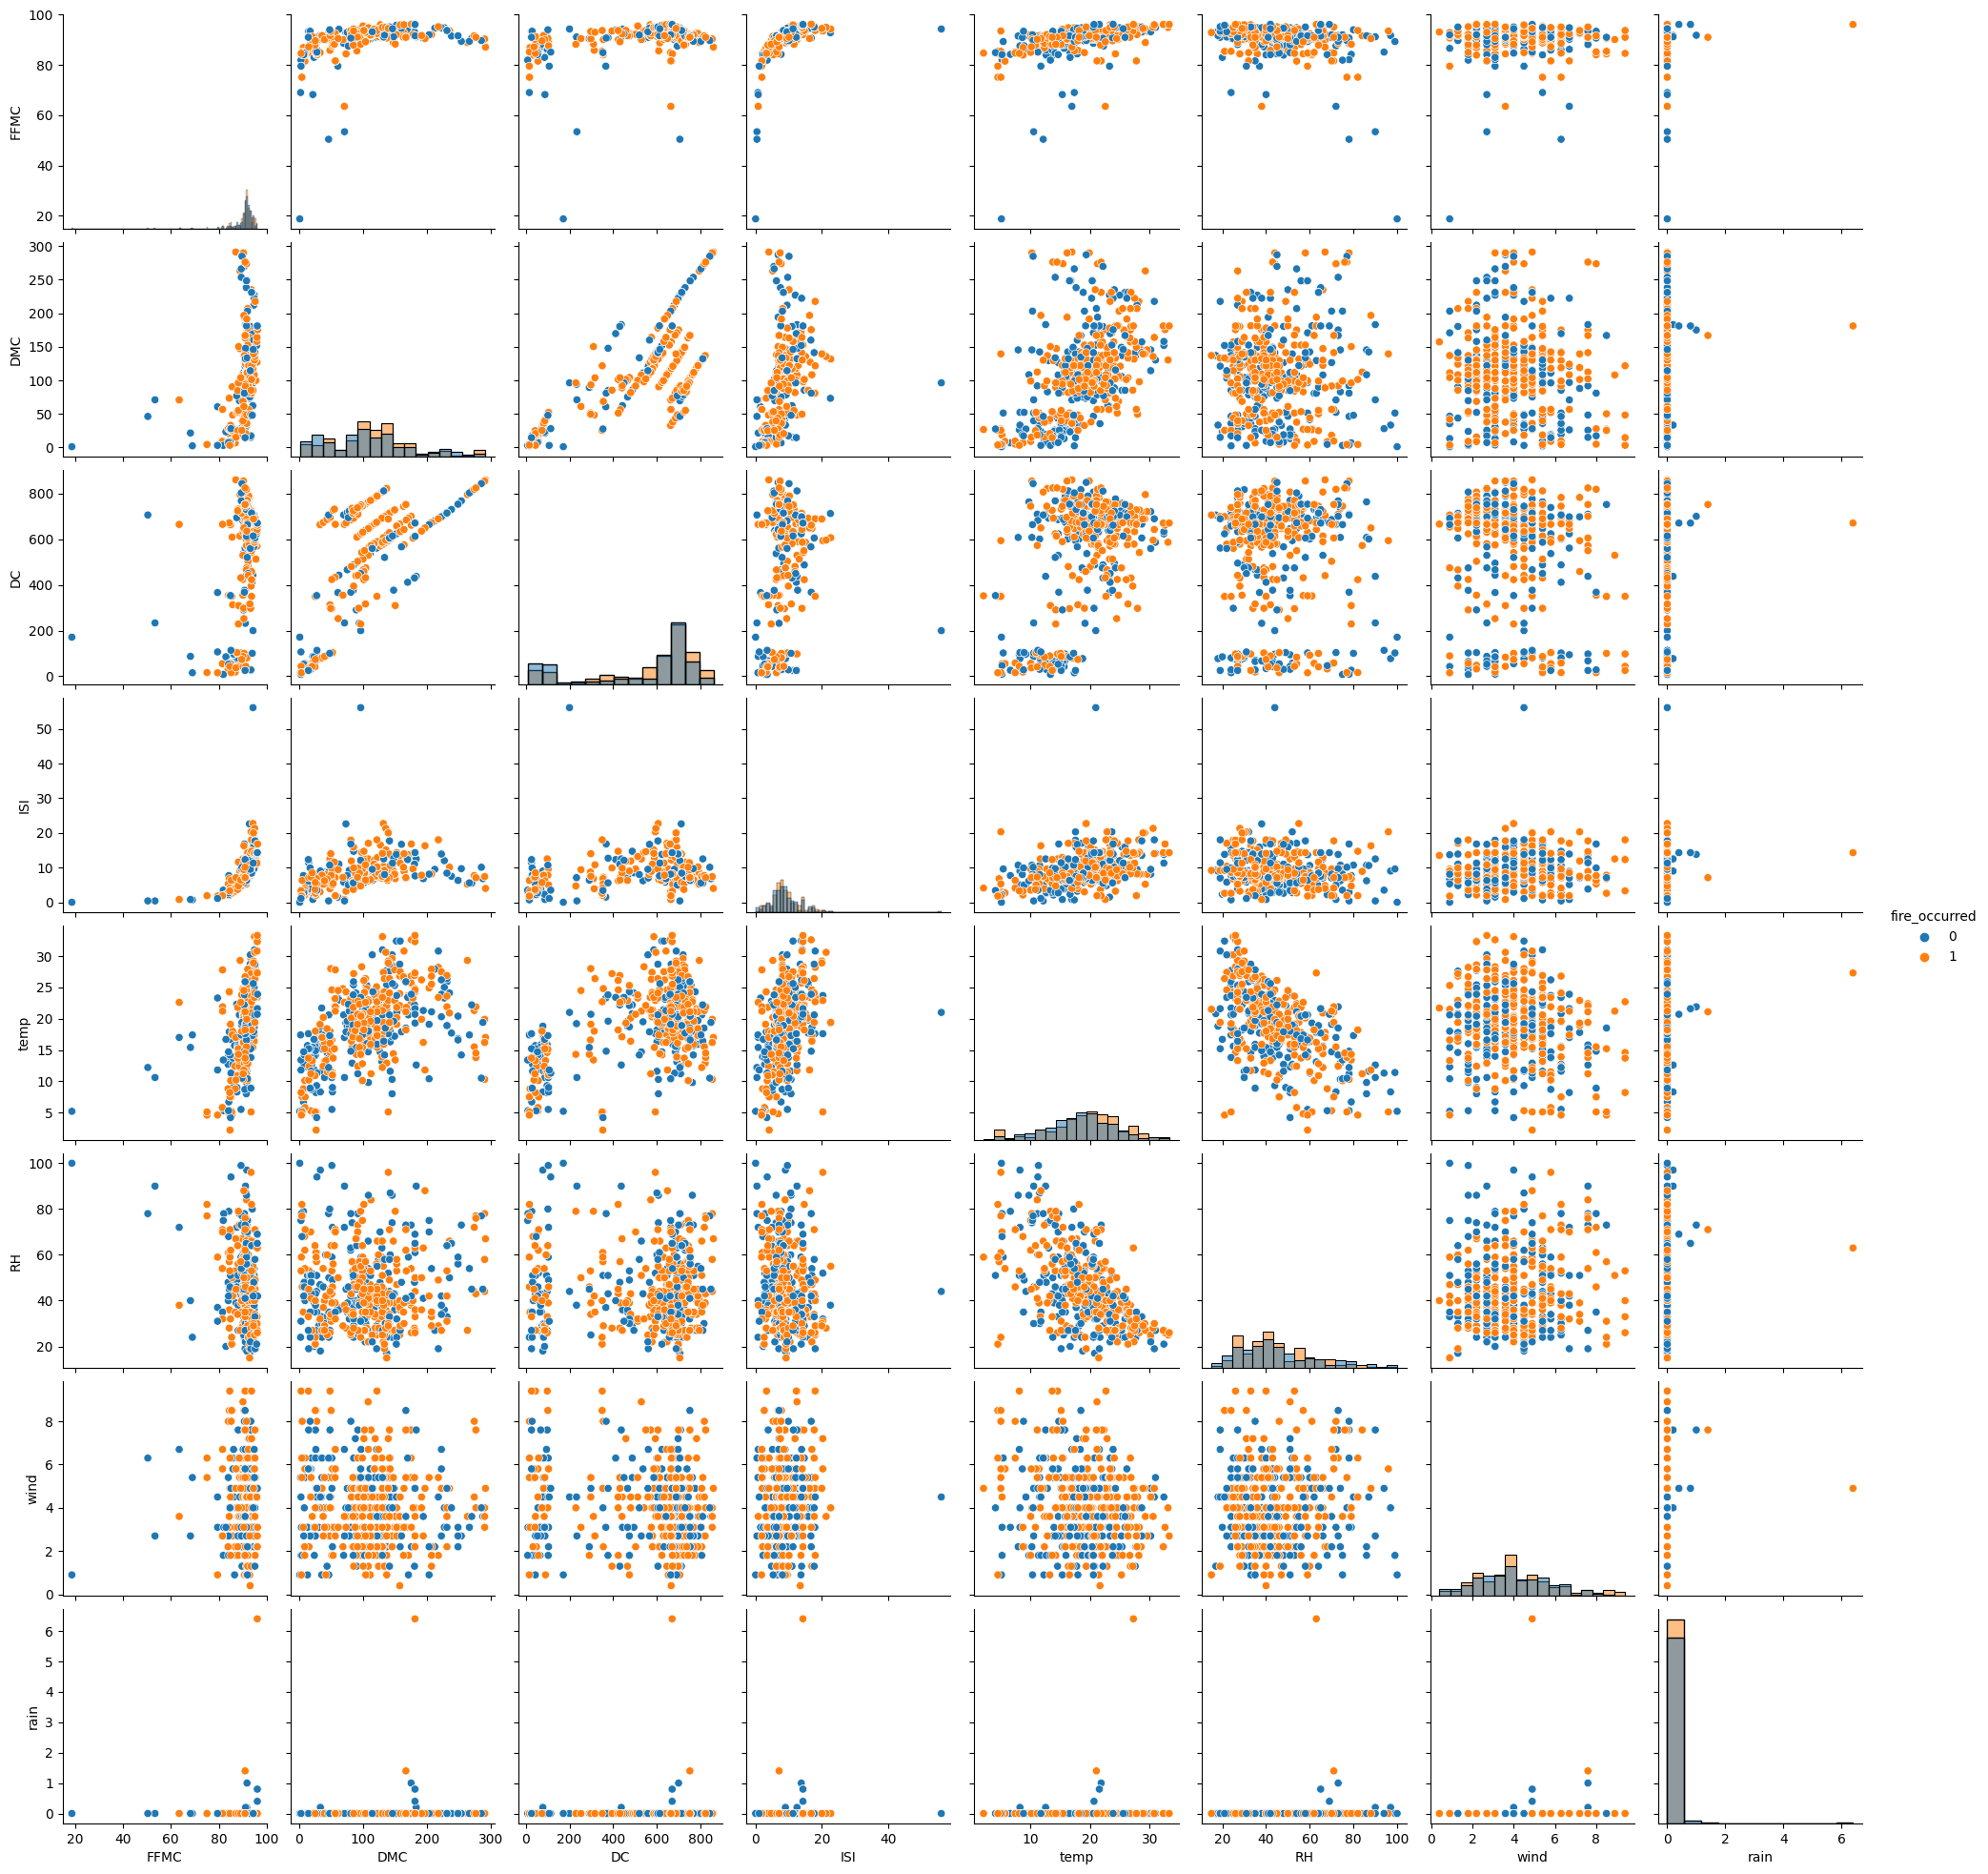

In [17]:
# Create pairplot based on fire occurrence
pairplot = sns.pairplot(df_forest_fires_cont_vars, hue='fire_occurred', diag_kind='hist')

Not sure how to better setup these pairplots or other plots to use to beneficially discover correlation

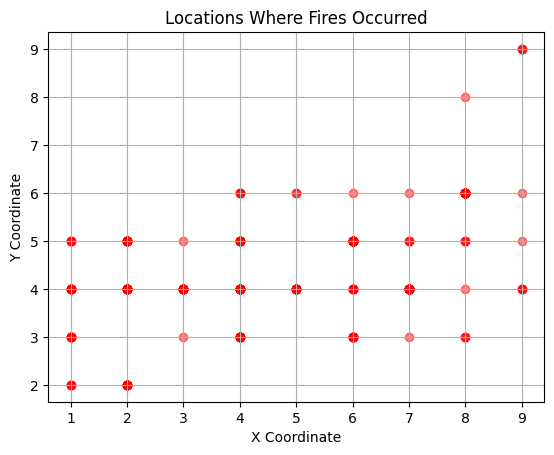

In [18]:
# Scatter plot of fire occurrences to visualize locations of fires 
df_fire_occurred = df_forest_fires[df_forest_fires['fire_occurred'] == 1]
plt.scatter(df_fire_occurred['X'], df_fire_occurred['Y'], color = 'red', alpha = 0.5)
plt.title('Locations Where Fires Occurred')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()

Did a plot of the entries when fires occurred with the X Y data to get an idea of vunerable areas.

In [31]:
# Data preprocessing:

# One-hot encoding for categorical vars ('month', 'day')
categorical_features = ['month', 'day']
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot_encoder, categorical_features)], remainder='passthrough')

# Apply dataset transformations
X_transformed = transformer.fit_transform(df_forest_fires.drop(columns=['area', 'fire_occurred']))

# Update columns after one-hot encoding
named_features = transformer.named_transformers_['one_hot'].get_feature_names_out()
remaining_features = df_forest_fires.drop(columns=['area', 'fire_occurred', 'month', 'day']).columns
all_features = list(named_features) + list(remaining_features)

# New dataframe
X = pd.DataFrame(X_transformed, columns=all_features)
#print(X)

# Define the target variable
y = df_forest_fires['fire_occurred']

# Split data (80/20) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)